**Machine Learning Model for Accuracy Prediction**

**STEP 1: UPLOADING THE CSV FILE**

In [ ]:
from google.colab import files
files.upload()

Saving Social_Network_Ads (1).csv to Social_Network_Ads (1).csv


{'Social_Network_Ads (1).csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\

**STEP 2: READING THE CSV FILE**

In [ ]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads (1).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


 **STEP 3: GET THE THE ENTIRE DATASET**

In [ ]:
df = pd.read_csv('Social_Network_Ads (1).csv')
print(df.to_string())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

**STEP 4: GET FULL INFO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**STEP 5: REPLACE FEMALE AND MALE WITH 0 & 1**

In [ ]:
df['Gender'] = df['Gender'].replace(['Female','Male'],[0,1])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**STEP 6: Eliminate USER ID**

In [ ]:
df = df.drop(['User ID'], axis = 1)
df.head()

#list_drop = ['User ID']
#df.drop(list_drop, axis=1, inplace=True)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**STEP 7: PLOT NECESSARY GRAPHS FOR DETAIL REPORTS**

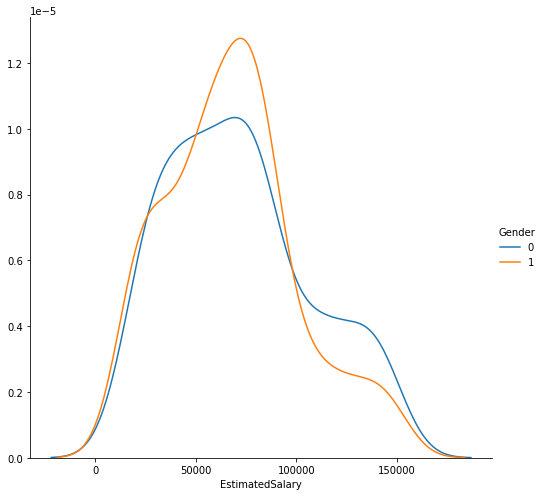

In [ ]:
import seaborn as sns
sns.FacetGrid(df, hue = 'Gender', height = 7).map(sns.kdeplot, 'EstimatedSalary').add_legend()

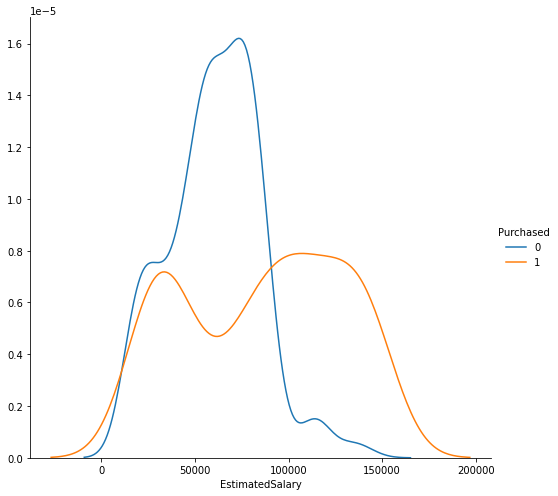

In [ ]:
sns.FacetGrid(df, hue = 'Purchased', height = 7).map(sns.kdeplot, 'EstimatedSalary').add_legend()

**STEP 8: MAKE CORRELATION GRAPHS**

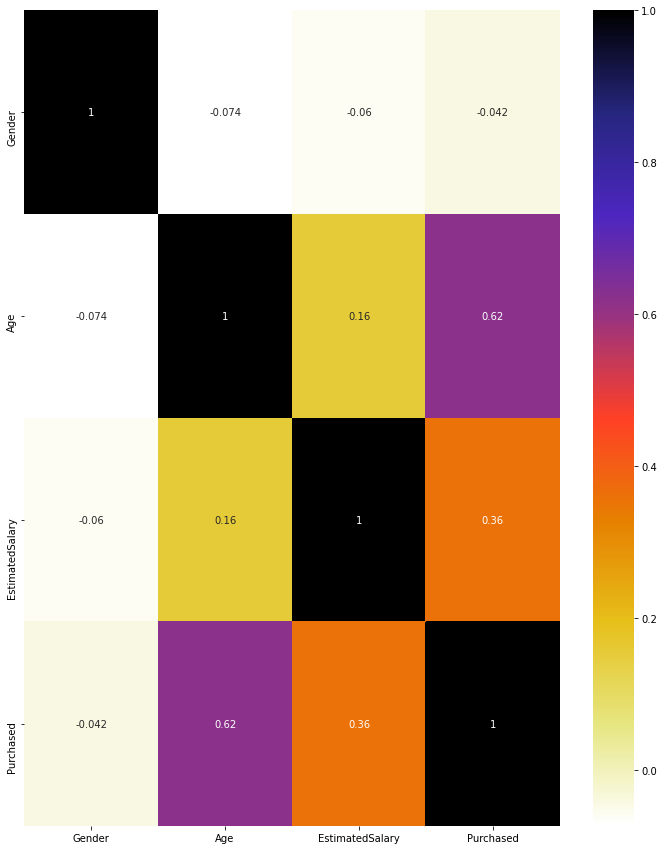

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12, 15))

corr = df.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)

**STEP 9: APPROACH THE MACHINE LEARNING MODEL**

**Find Feature Column**

In [ ]:
Feature_Cols = ['Gender','Age','EstimatedSalary']

x = df[Feature_Cols]
y = df['Purchased']

In [ ]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.10)

x_test

,Gender,Age,EstimatedSalary
235,1,46,79000
379,0,58,23000
255,0,52,90000
342,0,38,65000
305,1,42,54000
343,0,47,51000
34,1,27,90000
299,1,46,117000
143,1,30,89000
105,1,21,72000


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 235 to 384
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           40 non-null     int64
 1   Age              40 non-null     int64
 2   EstimatedSalary  40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


**STEP 10: SVM ALGORITHMS**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

**STEP 11: Check this prediction with original data**

In [ ]:
y_test

235    1
379    1
255    1
342    0
305    0
343    1
34     0
299    1
143    0
105    0
390    1
355    1
276    0
380    0
392    1
5      0
49     0
253    1
359    0
67     0
291    1
254    0
387    0
234    0
333    0
354    1
12     0
96     0
10     0
352    1
106    0
398    0
204    1
316    1
38     0
162    0
205    0
283    1
80     0
384    1
Name: Purchased, dtype: int64

**STEP 12: Repeat the algorithms by Changing Kernels**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

**STEP 13: Check underfitting or Overfitting with K-fold cross validation**

In [ ]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits = 10, random_state = 31)

model = SVC(kernel = 'linear')
results = model_selection.cross_val_score(model,x_train, y_train, cv =kfold)
results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
